Shape: (1728, 7)
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Missing-like entries BEFORE injection: 0
Injected missing values (because dataset originally had none).
Missing entries AFTER injection/check:
 buying       79
maint        93
doors        83
persons      89
lug_boot     86
safety      105
dtype: int64

[Module 1] Example rows after SimpleImputer:
   buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     4       4    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med

[Module 2] Symmetry table (on ordinal-coded values):
     Feature  Mean(ordinal)  Media

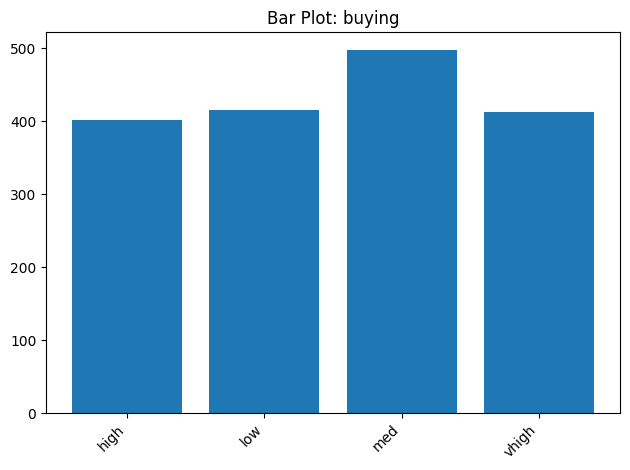

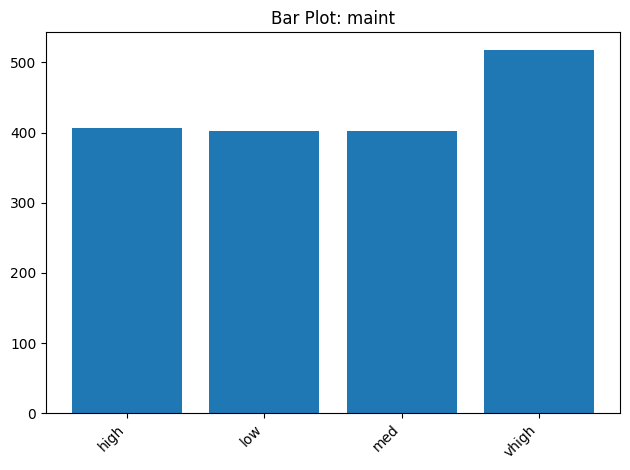

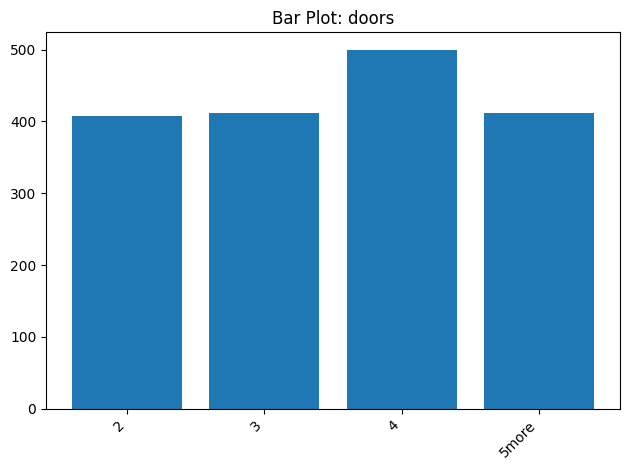

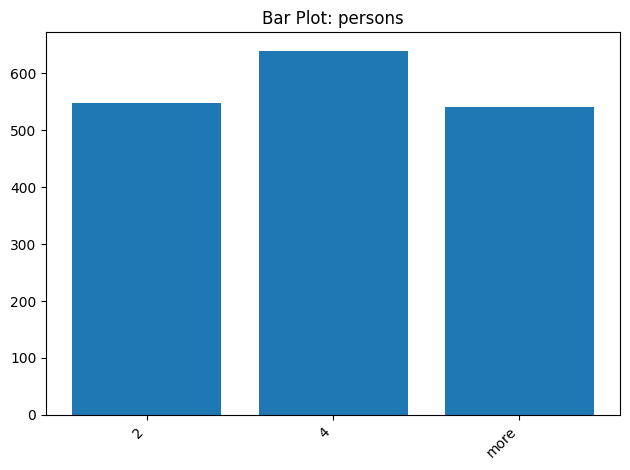

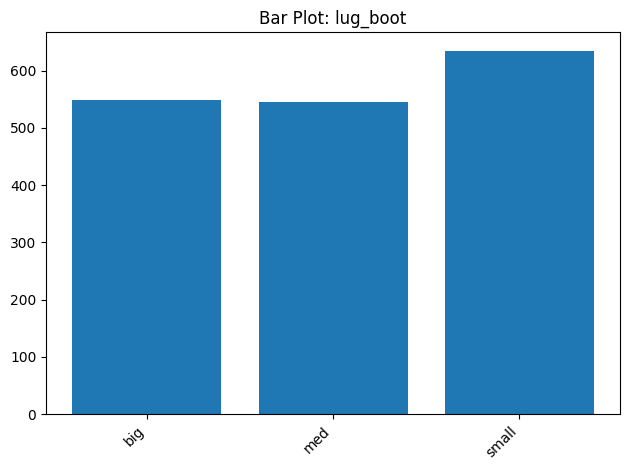

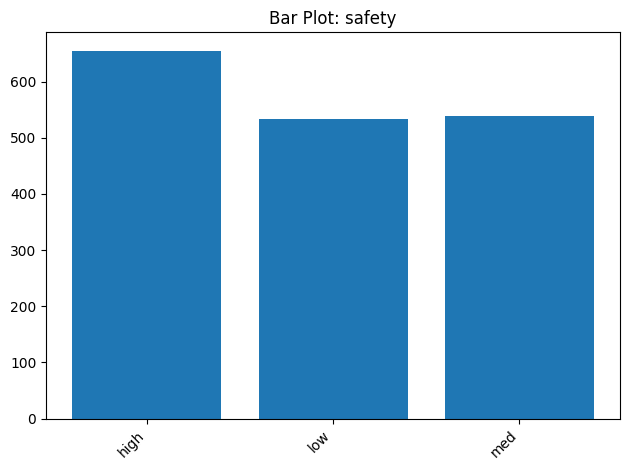

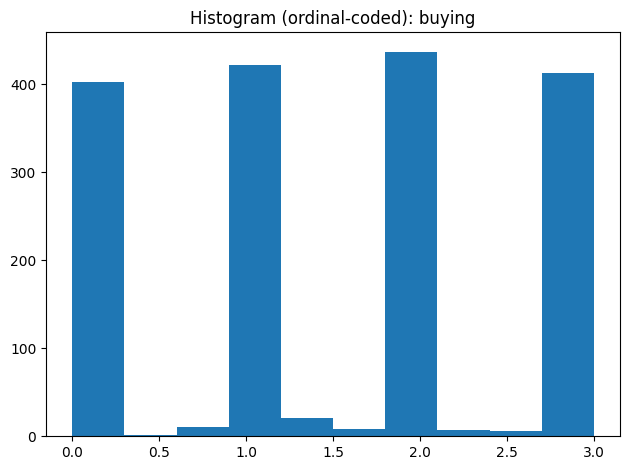

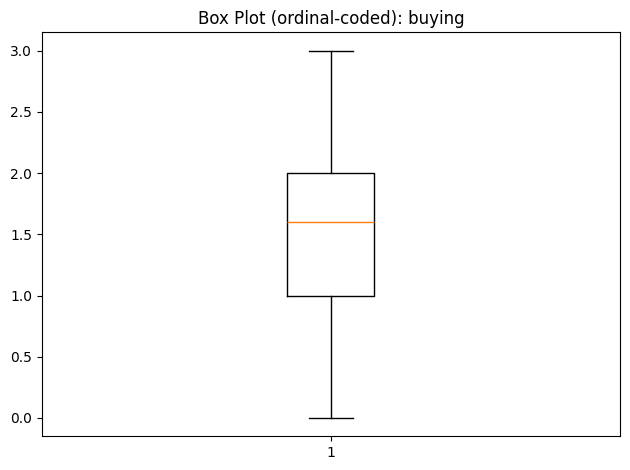

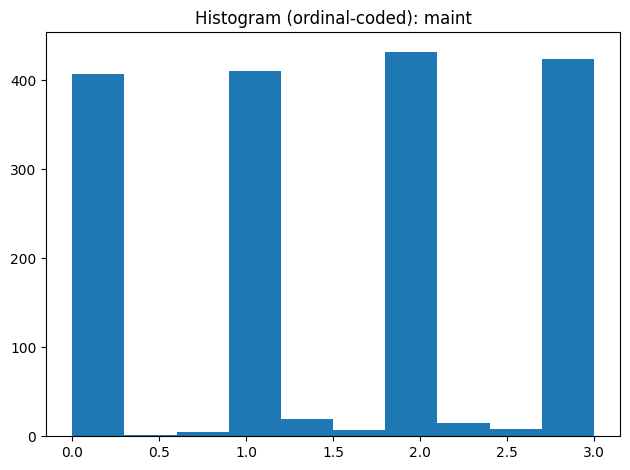

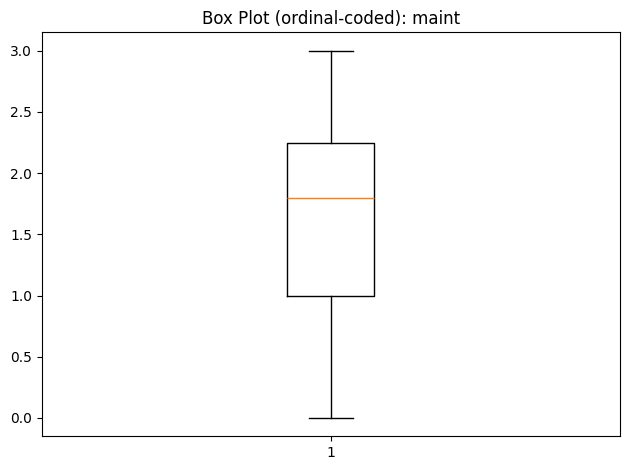

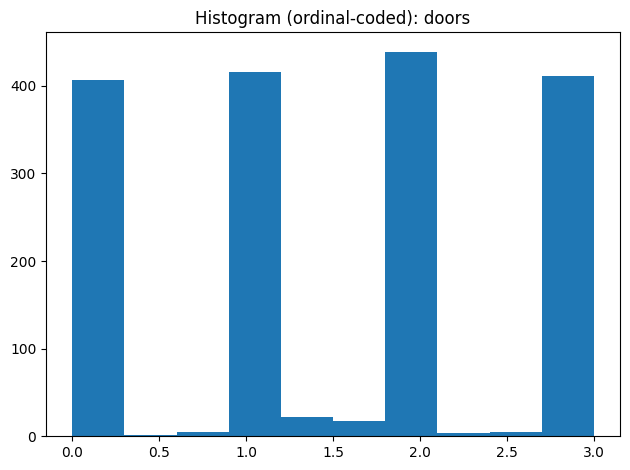

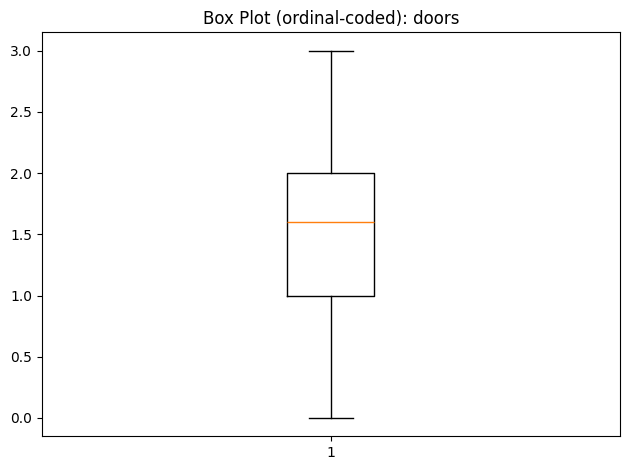

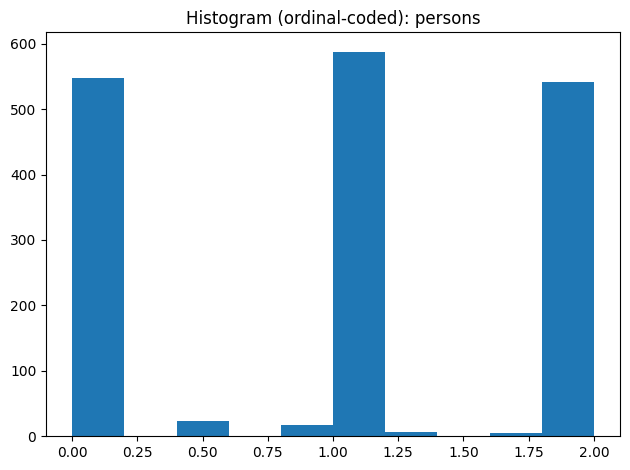

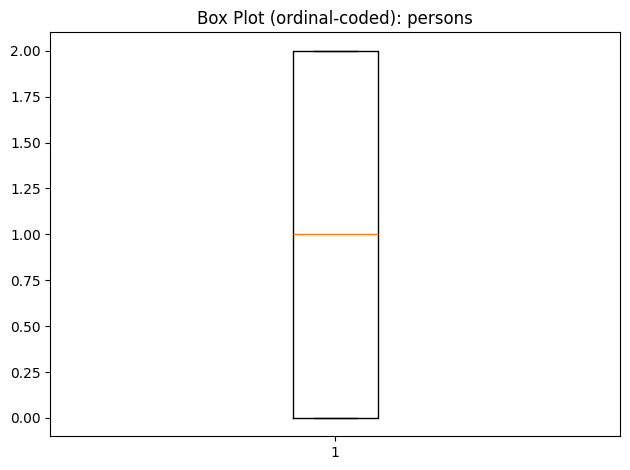

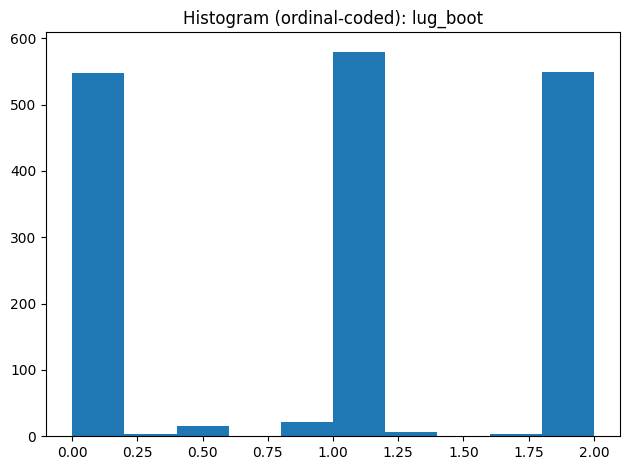

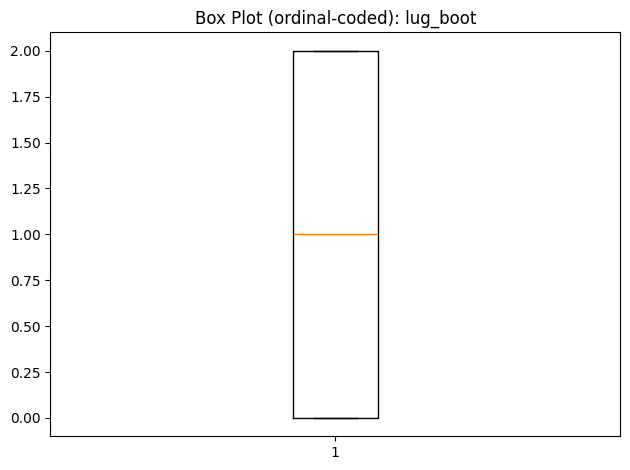

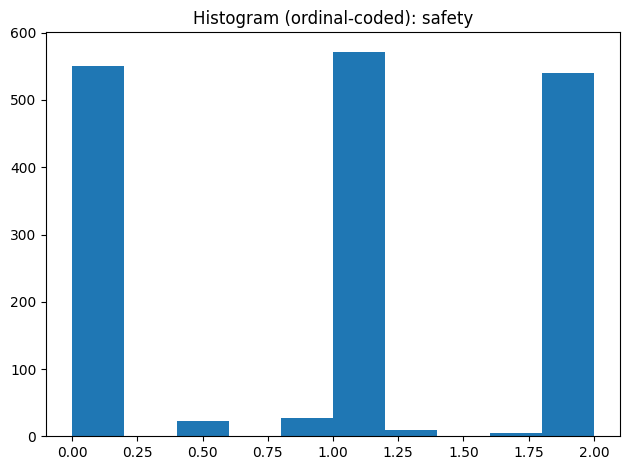

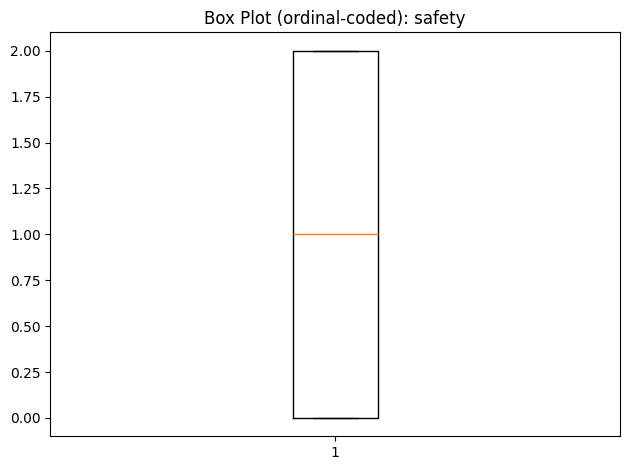


[Module 5] Entropy (original): 1.205740970012175

[Module 5] Balancing comparison:
         Method  Entropy  CV_F1_macro_mean  CV_F1_macro_std  New_n
0  undersample      2.0          0.785836         0.081084    260
1   oversample      2.0          0.979450         0.005163   4840
2       smoten      2.0          0.963625         0.004667   4840

Chosen balancing method (best CV macro-F1): oversample
Entropy (balanced): 2.0


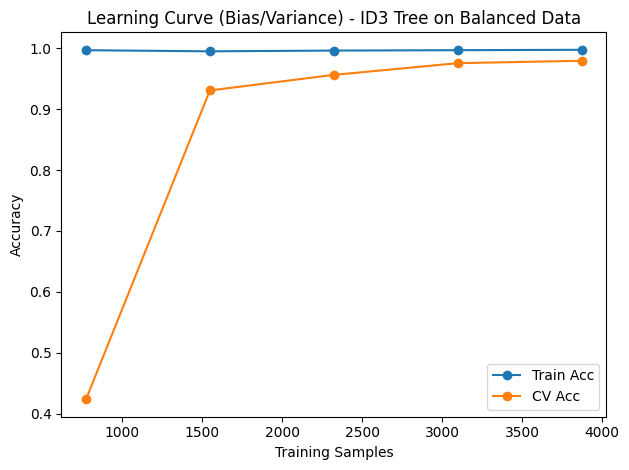


[Module 6a] ID3 Decision Tree
Accuracy: 0.9776859504132231
              precision    recall  f1-score   support

         acc       0.93      1.00      0.96       303
        good       0.99      1.00      1.00       302
       unacc       1.00      0.91      0.96       303
       vgood       0.99      1.00      1.00       302

    accuracy                           0.98      1210
   macro avg       0.98      0.98      0.98      1210
weighted avg       0.98      0.98      0.98      1210


--- Decision Tree Rules (export_text) ---

|--- persons <= 0.10
|   |--- class: 2
|--- persons >  0.10
|   |--- safety <= 0.10
|   |   |--- lug_boot <= 1.30
|   |   |   |--- buying <= 0.70
|   |   |   |   |--- maint <= 2.80
|   |   |   |   |   |--- buying <= 0.10
|   |   |   |   |   |   |--- maint <= 1.40
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- maint >  1.40
|   |   |   |   |   |   |   |--- maint <= 1.90
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |  

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro


[Module 6c] MLP (tuned)
Best hidden_layer_sizes: (64, 32) alpha: 0.0001
Accuracy: 0.9702479338842975
              precision    recall  f1-score   support

         acc       0.92      0.97      0.95       303
        good       0.97      1.00      0.99       302
       unacc       1.00      0.91      0.95       303
       vgood       0.99      1.00      1.00       302

    accuracy                           0.97      1210
   macro avg       0.97      0.97      0.97      1210
weighted avg       0.97      0.97      0.97      1210


[Module 6d] Linear Regression (ordinal target)
MSE: 1.009600992084079


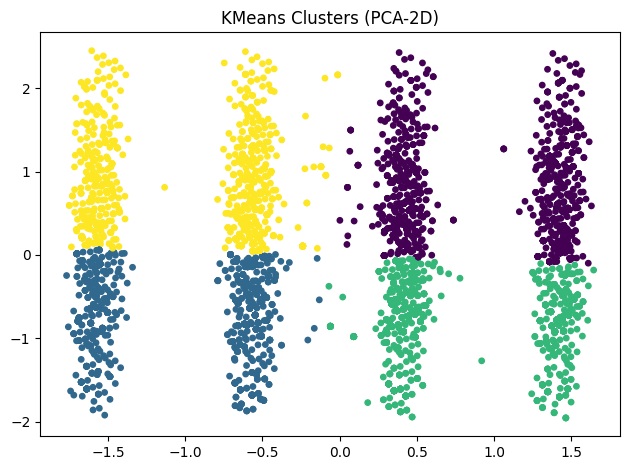

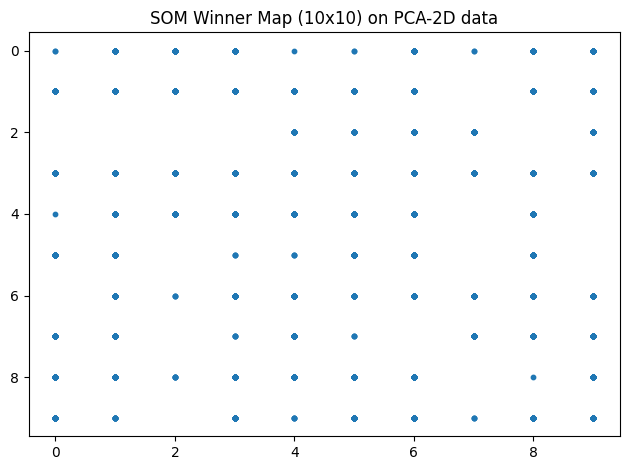

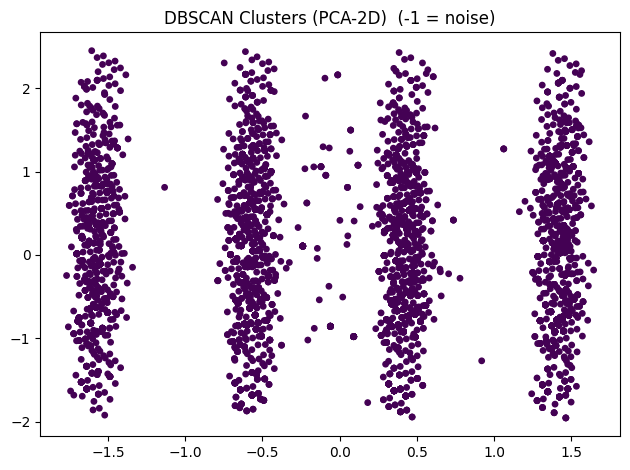

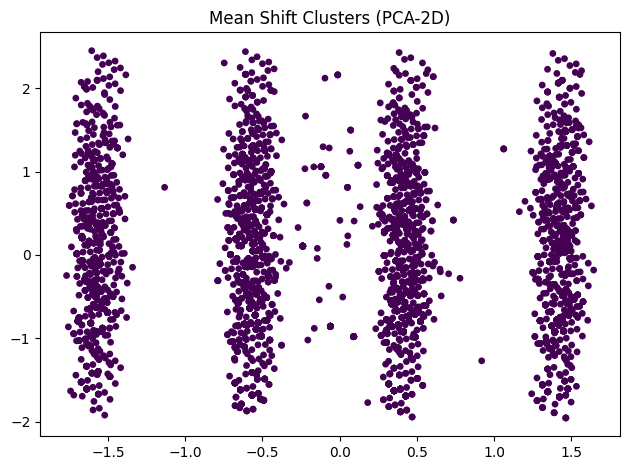


[Module 8] ID3 Metrics
Accuracy: 0.9776859504132231
Precision (macro): 0.9790182186234817
Recall (macro): 0.9777227722772277
F1 (macro): 0.9775887983043856
Confusion Matrix:
 [[302   0   0   1]
 [  0 302   0   0]
 [ 23   2 277   1]
 [  0   0   0 302]]
Class acc: TP=302, FP=23, TN=884, FN=1, Sensitivity=0.997, Specificity=0.975
Class good: TP=302, FP=2, TN=906, FN=0, Sensitivity=1.000, Specificity=0.998
Class unacc: TP=277, FP=0, TN=907, FN=26, Sensitivity=0.914, Specificity=1.000
Class vgood: TP=302, FP=2, TN=906, FN=0, Sensitivity=1.000, Specificity=0.998


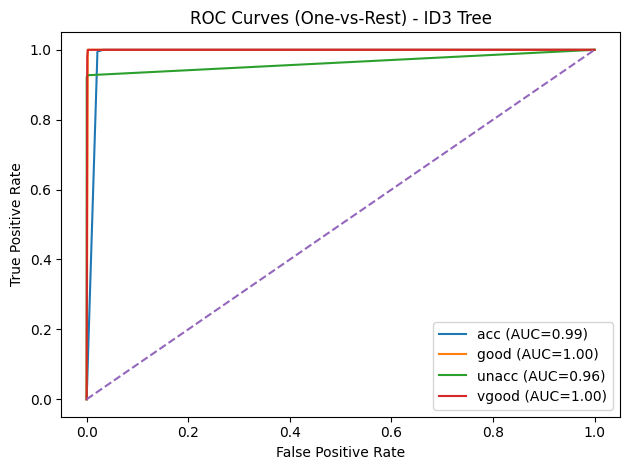


[Module 8] Silhouette Scores (on PCA-2D)
Silhouette (KMeans): 0.393
Silhouette (DBSCAN): not valid (<=1 cluster).
Silhouette (MeanShift): not valid (<=1 cluster).

DONE.


In [3]:
# ============================================================
# CAPSTONE PROJECT 5: Car Evaluation Dataset (Kaggle / UCI style)
# Modules 1–8 in ONE end-to-end script
#
# IMPORTANT:
# - This dataset is fully categorical in many versions (no missing values).
# - Since you WANT missing values BEFORE preprocessing (for learning),
#   this code checks and (only if needed) injects controlled missingness.
# ============================================================

# -------------------------
# 0) Imports
# -------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # needed to enable IterativeImputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, LabelEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, classification_report, silhouette_score
)
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, MeanShift

from imblearn.over_sampling import RandomOverSampler, SMOTEN
from imblearn.under_sampling import RandomUnderSampler
!pip -q install minisom

from minisom import MiniSom


# -------------------------
# 1) Load Dataset (UCI Raw Format – No Header)
# -------------------------
import pandas as pd

DATA_PATH = "/content/sample_data/car_evaluation.csv"

# Load dataset without header
df = pd.read_csv(DATA_PATH, header=None)

# Assign correct column names
df.columns = [
    "buying", "maint", "doors",
    "persons", "lug_boot", "safety", "class"
]

print("Shape:", df.shape)
print(df.head())

# -------------------------
# Treat all columns as categorical (strings)
# -------------------------
target_col = "class"
feature_cols = [c for c in df.columns if c != target_col]

for c in feature_cols + [target_col]:
    df[c] = df[c].astype(str)


# ============================================================
# MODULE 1: Data Cleaning (Imputing)
# - Ensure missing values exist BEFORE preprocessing.
# - If dataset has no missing, inject small missingness (5% per feature).
# ============================================================
missing_before = df[feature_cols].isna().sum().sum() + (df[feature_cols] == "nan").sum().sum()
print("\nMissing-like entries BEFORE injection:", missing_before)

# Convert literal "nan" strings to real NaN (common after cast to str)
for c in feature_cols:
    df.loc[df[c].str.lower().eq("nan"), c] = np.nan

# If still no missing, inject controlled missingness for learning purpose
if df[feature_cols].isna().sum().sum() == 0:
    rng = np.random.default_rng(42)
    inject_rate = 0.05  # 5% missing per column
    df_missing = df.copy()
    for c in feature_cols:
        mask = rng.random(df_missing.shape[0]) < inject_rate
        df_missing.loc[mask, c] = np.nan
    df = df_missing
    print("Injected missing values (because dataset originally had none).")

print("Missing entries AFTER injection/check:\n", df[feature_cols].isna().sum())

# Split X, y
X = df[feature_cols].copy()
y = df[target_col].copy()

# Three imputers:
# 1) SimpleImputer (most_frequent)  -> correct for categorical
# 2) KNNImputer                    -> requires numeric, so we ordinal-encode temporarily
# 3) IterativeImputer              -> requires numeric, same approach

# --- Helper: numeric view for KNN/Iterative (ordinal-encode categories)
ordinal_for_impute = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

X_ord = pd.DataFrame(ordinal_for_impute.fit_transform(X), columns=feature_cols)

# Mask missing in ordinal frame consistently
# (OrdinalEncoder outputs float; NaNs stay NaN)
# KNN Imputation
knn_imp = KNNImputer(n_neighbors=5)
X_knn = pd.DataFrame(knn_imp.fit_transform(X_ord), columns=feature_cols)

# Iterative Imputation
it_imp = IterativeImputer(random_state=42, max_iter=10)
X_iter = pd.DataFrame(it_imp.fit_transform(X_ord), columns=feature_cols)

# Simple Imputation on original categorical
simp_imp = SimpleImputer(strategy="most_frequent")
X_simple = pd.DataFrame(simp_imp.fit_transform(X), columns=feature_cols)

print("\n[Module 1] Example rows after SimpleImputer:\n", X_simple.head())

# ============================================================
# MODULE 2: Symmetry (Mean/Median/Skewness)
# NOTE:
# - Original features are categorical, so mean/median/skewness aren't “statistical” in the usual sense.
# - To still satisfy the module (and learn), we compute these on ORDINAL-CODED values.
# ============================================================
def skewness(x):
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]
    if x.size < 3:
        return np.nan
    m = x.mean()
    s = x.std(ddof=1)
    if s == 0:
        return 0.0
    return np.mean(((x - m) / s) ** 3)

X_for_sym = X_knn  # using one imputed numeric version
sym_table = []
for c in feature_cols:
    col = X_for_sym[c].values
    mean_v = float(np.mean(col))
    median_v = float(np.median(col))
    skew_v = float(skewness(col))

    if np.isnan(skew_v):
        tag = "Unknown"
    elif abs(skew_v) < 0.5:
        tag = "Symmetric"
    elif skew_v >= 0.5:
        tag = "Right-Skewed"
    else:
        tag = "Left-Skewed"

    sym_table.append([c, mean_v, median_v, skew_v, tag])

sym_df = pd.DataFrame(sym_table, columns=["Feature", "Mean(ordinal)", "Median(ordinal)", "Skewness(ordinal)", "Class"])
print("\n[Module 2] Symmetry table (on ordinal-coded values):\n", sym_df)

# ============================================================
# MODULE 3: Data Transformations
# - Feature preprocessing: StandardScaler / MinMax / Robust / MaxAbs on ONE-HOT features
# - Skewness fixing: Yeo-Johnson on ordinal-coded numeric features (demo)
# ============================================================
from sklearn.preprocessing import PowerTransformer

# (A) Skewness fix demo on ordinal-coded features
pt = PowerTransformer(method="yeo-johnson", standardize=True)
X_yeojohn = pd.DataFrame(pt.fit_transform(X_for_sym), columns=feature_cols)

# Compare skewness before/after (ordinal view)
skew_compare = []
for c in feature_cols:
    skew_before = skewness(X_for_sym[c].values)
    skew_after = skewness(X_yeojohn[c].values)
    skew_compare.append([c, skew_before, skew_after])
skew_cmp_df = pd.DataFrame(skew_compare, columns=["Feature", "Skew_Before", "Skew_After"])
print("\n[Module 3] Skewness comparison (ordinal -> Yeo-Johnson):\n", skew_cmp_df)

# (B) One-hot + scaling pipelines (for models that need scaling, e.g., MLP)
# For sparse one-hot matrices, StandardScaler must use with_mean=False.
pre_onehot = ColumnTransformer(
    transformers=[("oh", OneHotEncoder(handle_unknown="ignore"), feature_cols)],
    remainder="drop"
)

scalers = {
    "standard": StandardScaler(with_mean=False),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(with_centering=False),
    "maxabs": MaxAbsScaler()
}

# ============================================================
# MODULE 4: Univariate Visualizations
# - Bar plot (best for categorical)
# - Histogram/Box plot on ordinal-coded values (learning/demo)
# ============================================================
# Bar plots for categorical distributions
for c in feature_cols:
    vc = X_simple[c].value_counts().sort_index()
    plt.figure()
    plt.bar(vc.index.astype(str), vc.values)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Bar Plot: {c}")
    plt.tight_layout()
    plt.show()

# Histogram + Boxplot on ordinal-coded values
for c in feature_cols:
    plt.figure()
    plt.hist(X_for_sym[c].values, bins=10)
    plt.title(f"Histogram (ordinal-coded): {c}")
    plt.tight_layout()
    plt.show()

    # Boxplot with IQR idea
    plt.figure()
    plt.boxplot(X_for_sym[c].values, vert=True)
    plt.title(f"Box Plot (ordinal-coded): {c}")
    plt.tight_layout()
    plt.show()

# ============================================================
# MODULE 5: Balancing Dataset + Entropy + Bias/Variance discussion
# - We'll try: undersampling, oversampling, SMOTEN (best fit for categorical)
# - Pick the best by CV macro-F1 using an ID3 tree as a quick evaluator.
# ============================================================
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Use ordinal-coded (imputed) features for balancing methods that expect numeric arrays
X_bal = X_knn.values  # numeric

def entropy_of_labels(y_arr):
    y_arr = np.asarray(y_arr)
    counts = np.bincount(y_arr)
    probs = counts[counts > 0] / counts.sum()
    return float(-np.sum(probs * np.log2(probs)))

print("\n[Module 5] Entropy (original):", entropy_of_labels(y_enc))

samplers = {
    "undersample": RandomUnderSampler(random_state=42),
    "oversample": RandomOverSampler(random_state=42),
    "smoten": SMOTEN(random_state=42)  # specialized for categorical-like features (works with integer-coded categories)
}

# We treat X_bal columns as "categorical codes" for SMOTEN to make sense.
# (They are ordinal codes, which is the closest acceptable representation here.)
base_clf = DecisionTreeClassifier(criterion="entropy", random_state=42)  # ID3-like

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for name, sampler in samplers.items():
    X_res, y_res = sampler.fit_resample(X_bal, y_enc)
    ent = entropy_of_labels(y_res)
    f1s = cross_val_score(base_clf, X_res, y_res, cv=cv, scoring="f1_macro")
    scores.append([name, ent, float(f1s.mean()), float(f1s.std()), X_res.shape[0]])

scores_df = pd.DataFrame(scores, columns=["Method", "Entropy", "CV_F1_macro_mean", "CV_F1_macro_std", "New_n"])
print("\n[Module 5] Balancing comparison:\n", scores_df)

best_method = scores_df.sort_values("CV_F1_macro_mean", ascending=False).iloc[0]["Method"]
print("\nChosen balancing method (best CV macro-F1):", best_method)

best_sampler = samplers[best_method]
X_res, y_res = best_sampler.fit_resample(X_bal, y_enc)
print("Entropy (balanced):", entropy_of_labels(y_res))

# Bias/Variance analysis (simple learning curve) on chosen balanced data
train_sizes, train_scores, val_scores = learning_curve(
    base_clf, X_res, y_res, cv=cv, scoring="accuracy",
    train_sizes=np.linspace(0.2, 1.0, 5), random_state=42
)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), marker="o", label="Train Acc")
plt.plot(train_sizes, val_scores.mean(axis=1), marker="o", label="CV Acc")
plt.title("Learning Curve (Bias/Variance) - ID3 Tree on Balanced Data")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# Prepare final train/test split (use balanced data for supervised models)
# ============================================================
X_tr, X_te, y_tr, y_te = train_test_split(
    X_res, y_res, test_size=0.25, random_state=42, stratify=y_res
)

# ============================================================
# MODULE 6: Supervised Models
# a) ID3 Decision Tree (entropy) + generate rules
# b) Bayesian Classifier (CategoricalNB)
# c) MLP (Backprop NN) with tuning (small grid)
# d) Multivariate Linear Regression (target mapped to ordinal score)
# ============================================================

# (a) ID3-like Decision Tree
id3 = DecisionTreeClassifier(criterion="entropy", max_depth=None, random_state=42)
id3.fit(X_tr, y_tr)
pred_id3 = id3.predict(X_te)

print("\n[Module 6a] ID3 Decision Tree")
print("Accuracy:", accuracy_score(y_te, pred_id3))
print(classification_report(y_te, pred_id3, target_names=le.inverse_transform(np.unique(y_te)), zero_division=0))

# Rules (text) - feature names are generic since we used ordinal-coded features
rules = export_text(id3, feature_names=feature_cols)
print("\n--- Decision Tree Rules (export_text) ---\n")
print(rules)

# (b) Bayesian Classifier: CategoricalNB expects non-negative integer features.
# Our ordinal coding should already be non-negative after imputation; ensure int & non-negative.
X_tr_nb = np.clip(np.round(X_tr).astype(int), 0, None)
X_te_nb = np.clip(np.round(X_te).astype(int), 0, None)

nb = CategoricalNB()
nb.fit(X_tr_nb, y_tr)
pred_nb = nb.predict(X_te_nb)

print("\n[Module 6b] Categorical Naive Bayes")
print("Accuracy:", accuracy_score(y_te, pred_nb))
print(classification_report(y_te, pred_nb, target_names=le.inverse_transform(np.unique(y_te)), zero_division=0))

# (c) MLP: better on one-hot + scaling
# Build a pipeline that:
# - imputes missing (most_frequent)
# - one-hot encodes
# - standard scales sparse
# BUT we need to start from ORIGINAL categorical data rows corresponding to balanced sample.
# Since we balanced on X_bal (ordinal-coded), for simplicity we train MLP on that same X_res but:
# - convert to float
# - Standardize
# (This is a learning demo; best practice would rebalance on original categories + one-hot.)
mlp_best = None
best_score = -1

for hidden in [(64,), (64, 32), (128, 64)]:
    for alpha in [1e-4, 1e-3]:
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden,
            activation="relu",
            solver="adam",
            alpha=alpha,
            learning_rate_init=1e-3,
            max_iter=300,
            random_state=42
        )
        # scale numeric features for MLP
        scaler = StandardScaler()
        X_tr_s = scaler.fit_transform(X_tr)
        X_te_s = scaler.transform(X_te)

        mlp.fit(X_tr_s, y_tr)
        pred = mlp.predict(X_te_s)
        f1m = f1_score(y_te, pred, average="macro")
        if f1m > best_score:
            best_score = f1m
            mlp_best = (mlp, scaler, hidden, alpha)

mlp_model, mlp_scaler, hidden, alpha = mlp_best
pred_mlp = mlp_model.predict(mlp_scaler.transform(X_te))

print("\n[Module 6c] MLP (tuned)")
print("Best hidden_layer_sizes:", hidden, "alpha:", alpha)
print("Accuracy:", accuracy_score(y_te, pred_mlp))
print(classification_report(y_te, pred_mlp, target_names=le.inverse_transform(np.unique(y_te)), zero_division=0))

# (d) Multivariate Linear Regression (forced requirement)
# Map class labels to an ordinal score and predict.
# This is NOT ideal for classification, but satisfies the module.
y_score = y_res.astype(float)  # already 0..(k-1)
X_tr_r, X_te_r, y_tr_r, y_te_r = train_test_split(
    X_res, y_score, test_size=0.25, random_state=42
)

lin = LinearRegression()
lin.fit(X_tr_r, y_tr_r)
pred_lin = lin.predict(X_te_r)

mse = float(np.mean((pred_lin - y_te_r) ** 2))
print("\n[Module 6d] Linear Regression (ordinal target)")
print("MSE:", mse)

# ============================================================
# MODULE 7: Unsupervised Learning
# We'll one-hot via PCA-friendly numeric representation:
# Use ordinal-coded numeric (X_res), then PCA to 2D for plots/clustering visuals.
# ============================================================
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X_res)

# (a) KMeans
kmeans = KMeans(n_clusters=len(np.unique(y_res)), random_state=42, n_init=10)
km_labels = kmeans.fit_predict(X2)

plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], c=km_labels, s=15)
plt.title("KMeans Clusters (PCA-2D)")
plt.tight_layout()
plt.show()

# (b) SOM
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X2)
som.train_random(X2, num_iteration=1000)

# Plot SOM winner positions
winners = np.array([som.winner(x) for x in X2])
plt.figure()
plt.scatter(winners[:, 0], winners[:, 1], s=10)
plt.title("SOM Winner Map (10x10) on PCA-2D data")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# (c) DBSCAN
db = DBSCAN(eps=0.5, min_samples=10)
db_labels = db.fit_predict(X2)

plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], c=db_labels, s=15)
plt.title("DBSCAN Clusters (PCA-2D)  (-1 = noise)")
plt.tight_layout()
plt.show()

# (d) Mean Shift
ms = MeanShift()
ms_labels = ms.fit_predict(X2)

plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], c=ms_labels, s=15)
plt.title("Mean Shift Clusters (PCA-2D)")
plt.tight_layout()
plt.show()

# ============================================================
# MODULE 8: Performance Metrics
# - Sensitivity, Specificity, Accuracy, Precision, Recall, F1 from confusion matrix
# - ROC (multiclass One-vs-Rest style)
# - Silhouette Score for clustering
# ============================================================
def cm_metrics(cm):
    # For multiclass: compute per-class sensitivity (recall) and specificity.
    # sensitivity_i = TP_i / (TP_i + FN_i)
    # specificity_i = TN_i / (TN_i + FP_i)
    n = cm.shape[0]
    metrics = []
    for i in range(n):
        TP = cm[i, i]
        FN = cm[i, :].sum() - TP
        FP = cm[:, i].sum() - TP
        TN = cm.sum() - (TP + FN + FP)

        sens = TP / (TP + FN) if (TP + FN) else 0.0
        spec = TN / (TN + FP) if (TN + FP) else 0.0
        metrics.append((TP, FP, TN, FN, sens, spec))
    return metrics

# Confusion-matrix-based metrics for ID3 (as example)
cm = confusion_matrix(y_te, pred_id3)
acc = accuracy_score(y_te, pred_id3)
prec = precision_score(y_te, pred_id3, average="macro", zero_division=0)
rec = recall_score(y_te, pred_id3, average="macro", zero_division=0)
f1m = f1_score(y_te, pred_id3, average="macro", zero_division=0)

print("\n[Module 8] ID3 Metrics")
print("Accuracy:", acc)
print("Precision (macro):", prec)
print("Recall (macro):", rec)
print("F1 (macro):", f1m)
print("Confusion Matrix:\n", cm)

per_class = cm_metrics(cm)
for i, (TP, FP, TN, FN, sens, spec) in enumerate(per_class):
    print(f"Class {le.inverse_transform([i])[0]}: TP={TP}, FP={FP}, TN={TN}, FN={FN}, Sensitivity={sens:.3f}, Specificity={spec:.3f}")

# ROC (multiclass OvR) using predicted probabilities from ID3
if hasattr(id3, "predict_proba"):
    y_te_bin = label_binarize(y_te, classes=np.arange(len(le.classes_)))
    proba = id3.predict_proba(X_te)

    plt.figure()
    for i in range(y_te_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_te_bin[:, i], proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{le.classes_[i]} (AUC={roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title("ROC Curves (One-vs-Rest) - ID3 Tree")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Silhouette scores (only valid if >1 cluster and no all-noise)
def safe_silhouette(X, labels, name):
    uniq = set(labels)
    if len(uniq) <= 1:
        print(f"Silhouette ({name}): not valid (<=1 cluster).")
        return
    if -1 in uniq and len(uniq) == 2:
        print(f"Silhouette ({name}): not meaningful (only 1 cluster + noise).")
        return
    # remove noise for DBSCAN
    if -1 in uniq:
        mask = labels != -1
        if len(set(labels[mask])) <= 1:
            print(f"Silhouette ({name}): not valid after removing noise.")
            return
        score = silhouette_score(X[mask], labels[mask])
    else:
        score = silhouette_score(X, labels)
    print(f"Silhouette ({name}): {score:.3f}")

print("\n[Module 8] Silhouette Scores (on PCA-2D)")
safe_silhouette(X2, km_labels, "KMeans")
safe_silhouette(X2, db_labels, "DBSCAN")
safe_silhouette(X2, ms_labels, "MeanShift")

print("\nDONE.")
